<a href="https://colab.research.google.com/github/Sudipta-Mitra/Iris-dataset/blob/main/iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
data=load_iris()
df=sns.load_dataset('iris')

In [ ]:
df['species']=data.target

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
df.shape

(150, 5)

In [ ]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

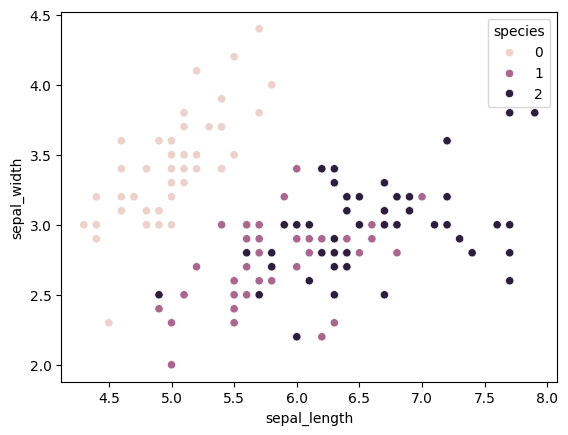

In [ ]:
sns.scatterplot(x='sepal_length',y='sepal_width',hue='species',data=df)

**MODEL BUILDING**

In [ ]:
X=df.drop('species',axis=1)
y=df['species']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=21)

**MODEL TRAINING**

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression()

In [ ]:
model_pred=model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
acc=accuracy_score(y_test,model_pred)
con=confusion_matrix(y_test,model_pred)
cla=classification_report(y_test,model_pred)
print(acc)
print(con)
print(cla)

0.9333333333333333
[[11  0  0]
 [ 0 10  2]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



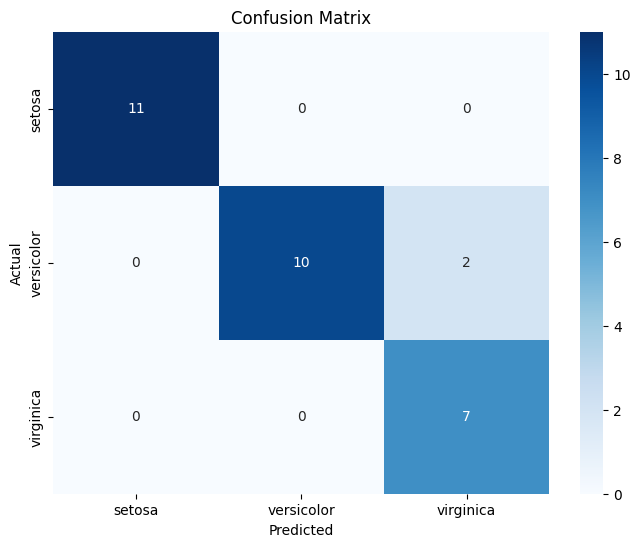

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(con, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()